In [1]:
import pandas as pd
import numpy as np

from plotnine import *

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# LLVM

In [3]:
llvm_ssa = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQiEAyOjaH6pg_kCnExOT2-V2blX0kAGM1oPhVOGepOtmU_wA68oyu-ZX2cUNkX-JDddJUQf_EUb5ji/pub?gid=0&single=true&output=csv')

# Stores

In [28]:
stores = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQTcwwyDo6wiFfgryeplLtTgSjwuJXAtDxCjKzRFXGh6PuVHGhhWjfr7Gux6y35QK8bnBBTg8Fyli-R/pub?gid=0&single=true&output=csv')
stores = stores.join(llvm_ssa['STORE'])
stores = stores.reset_index(drop=True)
stores['visible'] = stores.STORE/stores.stores_total
stores['invisible'] = 1 - stores.visible
stores['group'] = stores.benchmark.apply(lambda x: x.split('/')[1])

In [5]:
stores.head()

,index,benchmark,stores_before,stores_main,stores_end,stores_total,STORE,visible,invisible
0,0,Benchs/ASC_Sequoia/AMGmk,12375,1383459703,176,1383472254,1258505118,0.910,0.090
1,1,Benchs/ASC_Sequoia/CrystalMk,12244,2584006244,176,2584018664,2016000636,0.780,0.220
2,2,Benchs/ASC_Sequoia/IRSmk,12230,82411190,176,82423596,78783553,0.956,0.044
3,3,Benchs/ASCI_Purple,12342,45609710,176,45622228,30708782,0.673,0.327
4,4,Benchs/BenchmarkGame/fannkuch,12211,1834678475,176,1834690862,1801621248,0.982,0.018


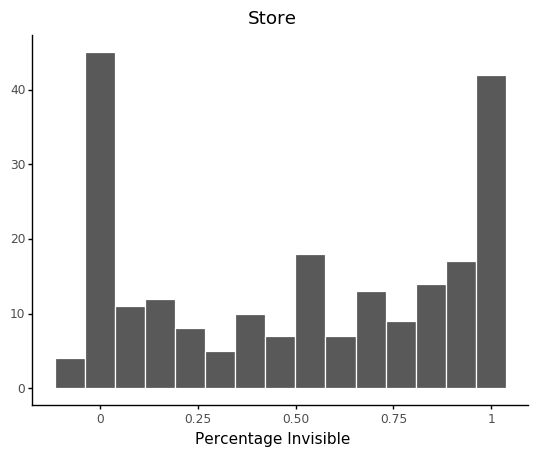

<ggplot: (280522444)>

In [173]:
(ggplot(stores, aes(x='invisible'))
 + geom_histogram(color='white', bins=15)
 + ggtitle('Store')
 + ylab('')
 + xlab('Percentage Invisible')
 + theme_classic()
)

# Loads

In [55]:
loads = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQTcwwyDo6wiFfgryeplLtTgSjwuJXAtDxCjKzRFXGh6PuVHGhhWjfr7Gux6y35QK8bnBBTg8Fyli-R/pub?gid=149453782&single=true&output=csv')
loads = loads.join(llvm_ssa['LOAD'])
loads = loads.reset_index(drop=True)
loads['visible'] = loads.LOAD/loads.loads_total
loads['invisible'] = 1 - loads.visible

In [56]:
loads.head()

,benchmark,loads_before,loads_main,loads_end,loads_total,LOAD,visible,invisible
0,Benchs/ASC_Sequoia/AMGmk,26701,19711140648,338,19711167687,16019912093,0.813,0.187
1,Benchs/ASC_Sequoia/CrystalMk,26475,7176021950,338,7176048763,5686000165,0.792,0.208
2,Benchs/ASC_Sequoia/IRSmk,26432,7048319698,338,7048346468,4218972134,0.599,0.401
3,Benchs/ASCI_Purple,26691,121303558,338,121330587,92787467,0.765,0.235
4,Benchs/BenchmarkGame/fannkuch,26333,1915257588,338,1915284259,1882176935,0.983,0.017


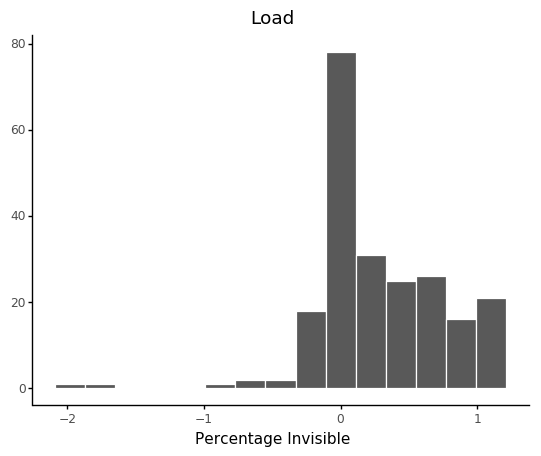

<ggplot: (-9223372036575519530)>

In [57]:
(ggplot(loads, aes(x='invisible'))
 + geom_histogram(color='white', bins=15)
 + ggtitle('Load')
 + ylab('')
 + xlab('Percentage Invisible')
 + theme_classic()
)

# BR

In [66]:
br = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQTcwwyDo6wiFfgryeplLtTgSjwuJXAtDxCjKzRFXGh6PuVHGhhWjfr7Gux6y35QK8bnBBTg8Fyli-R/pub?gid=1215540105&single=true&output=csv')
br = br.join(llvm_ssa['BR'])
br['visible'] = br.BR/(br.br_main + br.indirect_main)
br['invisible'] = 1 - br.visible

In [67]:
br.head()

,benchmark,br_before,br_main,br_end,indirect_before,indirect_main,indirect_end,BR,visible,invisible
0,Benchs/ASC_Sequoia/AMGmk,17497,10639581979,235,273,4132,1,6917411526,0.650,0.350
1,Benchs/ASC_Sequoia/CrystalMk,17295,3734020279,235,257,48000087,1,2966000357,0.784,0.216
2,Benchs/ASC_Sequoia/IRSmk,17298,87829012,235,260,135,1,84682057,0.964,0.036
3,Benchs/ASCI_Purple,17463,46890868,235,266,225699,1,38083058,0.808,0.192
4,Benchs/BenchmarkGame/fannkuch,17270,1877453759,235,268,717,1,1812452281,0.965,0.035


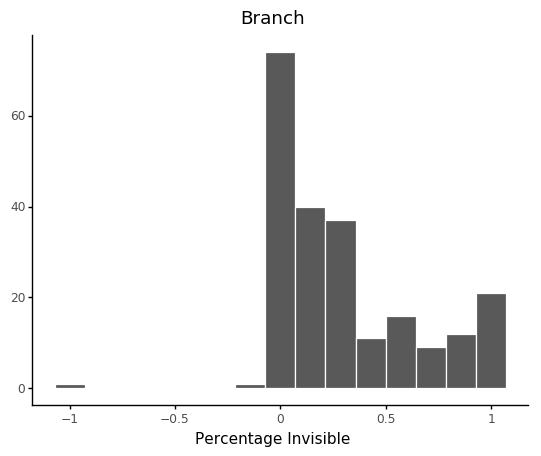

<ggplot: (278464751)>

In [72]:
(ggplot(br, aes(x='invisible'))
 + geom_histogram(color='white', bins=15)
 + ggtitle('Branch')
 + ylab('')
 + xlab('Percentage Invisible')
 + theme_classic()
)

# binops

In [167]:
binops = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQTcwwyDo6wiFfgryeplLtTgSjwuJXAtDxCjKzRFXGh6PuVHGhhWjfr7Gux6y35QK8bnBBTg8Fyli-R/pub?gid=770672452&single=true&output=csv')

for t in ['ADD', 'DIV', 'MUL', 'FADD', 'FMUL']:
    binops[t + '_total'] = binops[t + '_before'] + binops[t + '_main'] + binops[t + '_end']

## ADD

In [91]:
add = binops[['ADD_before', 'ADD_main', 'ADD_end', 'ADD_total', 'benchmark']]
add = add.join(llvm_ssa['ADD'])
add = add.reset_index(drop=True)
add['visible'] = add.ADD/add.ADD_total
add['invisible'] = 1 - add.visible

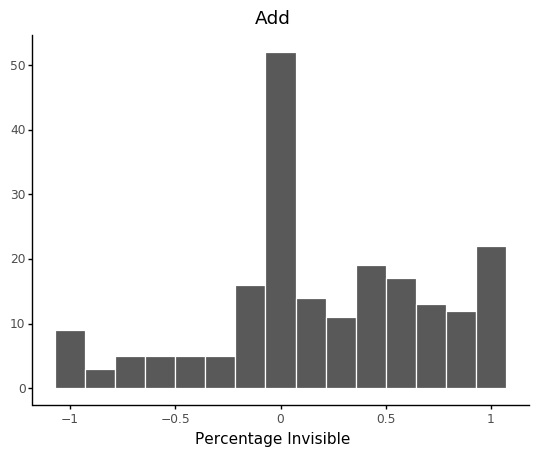

<ggplot: (278422890)>

In [100]:
(ggplot(add[add.invisible >= -1], aes(x='invisible'))
 + geom_histogram(color='white', bins=15)
 + ggtitle('Add')
 + ylab('')
 + xlab('Percentage Invisible')
 + theme_classic()
)

## Div

In [133]:
div = binops[['DIV_before', 'DIV_main', 'DIV_end', 'DIV_total', 'benchmark']]
llvm_ssa['DIV'] = llvm_ssa['SDIV'] + llvm_ssa['UDIV'] + llvm_ssa['SREM'] + llvm_ssa['UREM']
div = div.join(llvm_ssa['DIV'])
div['visible'] = div.DIV/div.DIV_total
div['invisible'] = 1 - div.visible

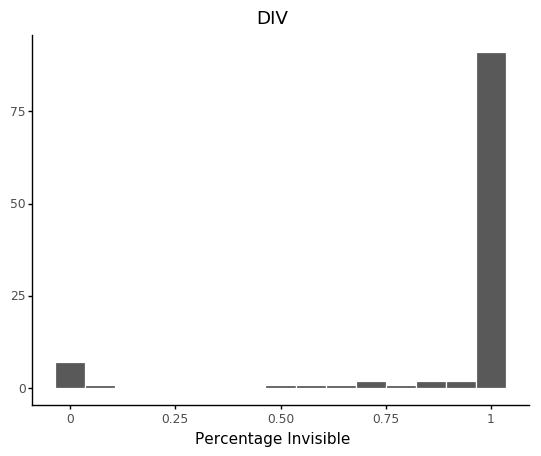

<ggplot: (-9223372036574909980)>

In [134]:
(ggplot(div[div.invisible > 0], aes(x='invisible'))
 + geom_histogram(color='white', bins=15)
 + ggtitle('DIV')
 + ylab('')
 + xlab('Percentage Invisible')
 + theme_classic()
)

## MUL

In [145]:
t = 'MUL'
mul = binops[[t + '_before', t + '_main', t + '_end', t + '_total', 'benchmark']]
mul = mul.join(llvm_ssa[t])
mul['visible'] = mul[t]/mul[t + '_total']
mul['invisible'] = 1 - mul.visible

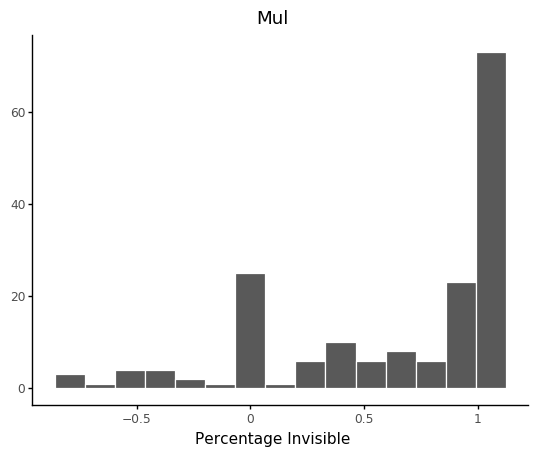

<ggplot: (-9223372036575262660)>

In [158]:
(ggplot(mul[mul.invisible > -1], aes(x='invisible'))
 + geom_histogram(color='white', bins=15)
 + ggtitle('Mul')
 + ylab('')
 + xlab('Percentage Invisible')
 + theme_classic()
)

## FADD

In [163]:
t = 'FADD'
fadd = binops[[t + '_before', t + '_main', t + '_end', t + '_total', 'benchmark']]
fadd = fadd.join(llvm_ssa[t])
fadd['visible'] = fadd[t]/fadd[t + '_total']
fadd['invisible'] = 1 - fadd.visible

/Users/guilhermeleobas/Library/Python/3.7/lib/python/site-packages/plotnine/layer.py:363: UserWarning: stat_bin : Removed 100 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


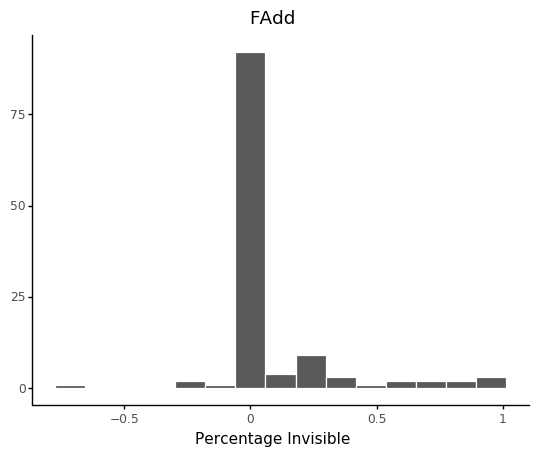

<ggplot: (279595994)>

In [166]:
(ggplot(fadd, aes(x='invisible'))
 + geom_histogram(color='white', bins=15)
 + ggtitle('FAdd')
 + ylab('')
 + xlab('Percentage Invisible')
 + theme_classic()
)

## FMUL

In [168]:
t = 'FMUL'
fmul = binops[[t + '_before', t + '_main', t + '_end', t + '_total', 'benchmark']]
fmul = fmul.join(llvm_ssa[t])
fmul['visible'] = fmul[t]/fmul[t + '_total']
fmul['invisible'] = 1 - fmul.visible

In [172]:
fmul[fmul.invisible < -10]

,FMUL_before,FMUL_main,FMUL_end,FMUL_total,benchmark,FMUL,visible,invisible
49,0,7575,0,7575,Benchs/mafft,1452423,191.739,-190.739
146,0,0,0,0,Benchs/Ptrdist/ks,35579250,inf,-inf


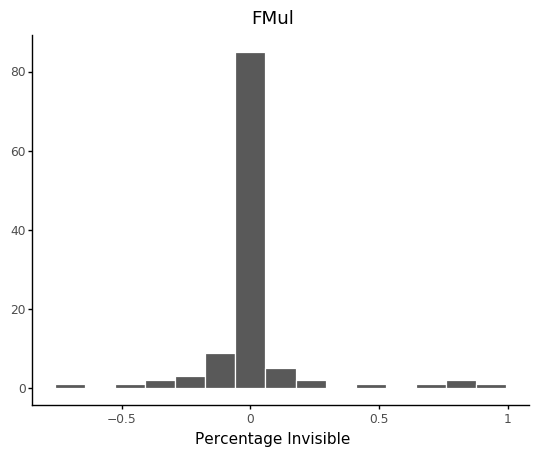

<ggplot: (278978259)>

In [171]:
(ggplot(fmul[fmul.invisible > -10], aes(x='invisible'))
 + geom_histogram(color='white', bins=15)
 + ggtitle('FMul')
 + ylab('')
 + xlab('Percentage Invisible')
 + theme_classic()
)